# Imports and Data Setup

In [2]:
import numpy as np 
import pandas as pd 

dataf = pd.read_csv('http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv')

data = dataf.to_numpy()

X = data[:,1]
y = data[:,0]

-------------------------------
# **Problem #1: Binary Clustering**
Text Answer At End Of Section

## Code:

In [3]:
import nltk.stem
from sklearn.feature_extraction.text import TfidfVectorizer

english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
X_train = vectorizer.fit_transform(X)

# map spam to 0 (negative) and ham to 1 (positive)
y_train = np.where(y == 'ham', 1, 0)

### Fitting KMeans

In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random', n_init=10)
km.fit(X_train)

KMeans(init='random', n_clusters=2)

In [19]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

print(precision_score(y_train, km.labels_))
print(f1_score(y_train, km.labels_))
print(recall_score(y_train, km.labels_))
print(accuracy_score(y_train, km.labels_))

0.8675054059367014
0.9086790898795429
0.9539559014267186
0.8326730805508394


### Fitting BIRCH Model

In [6]:
# from sklearn.mixture import GaussianMixture

# gm = GaussianMixture(n_components=2, init_params='random', n_init=1)
# dense_X = X_train.todense()

# dense_X

# gm.fit(dense_X)

# from sklearn.cluster import Birch

# birch = Birch(threshold=0.03, n_clusters=2)
# birch.fit(X_train)


In [7]:
# print(precision_score(y_train, birch.labels_))
# print(f1_score(y_train, birch.labels_))
# print(recall_score(y_train, birch.labels_))
# print(accuracy_score(y_train, birch.labels_))

## Answer:

Numerically, both cluster methods capture the spam vs not spam quite well. <br>

Before getting into the numbers, because of the nature of these being unsupervised methods, there is no way to determine <br>
which cluster is spam and which cluster is not spam just going off the assigned labels. <br>
The precision, recall, f1, and accuracy calculated in the below two paragraphs are from instances where the labels matched the <br>
cluster numbers. If that were not to be the case, the results would almost be flipped. Because we have the labels, however, <br>
I think its valid to think that I can use the numbers where the the labels and cluster numbers match.

For KMeans, the precision, recall, accuracy, and f1 score are, respectively, 0.8679, 0.9583, 0.8363, and 0.9108. <br>
All of these are pretty good as they are close to the maximum of 1, though mid 80% still isn't ideal for some of the scores. <br>
It clearly does good on the f1 score which may be a good indicator that it is doing good as an overall model. <br>
The pure accuracy of the model is roughly 83% which, while being quite high, isn't that great, though, with the nature of this data, <br>
its kind of hard to expect perfection.

As for the BIRCH model, I was going to use Gaussian Mixture, however, two things came up. The first was that the representation of the <br>
posts was in a sparse matrix, and the gaussian mixture model required a dense matrix. That was fine as its a simple .toarray(), however, <br>
when trying to run and fit the GMM, it was taking unreasonable amounts of time. I could not get one that actually finished <br>
running, so I just decided to use BIRCH. I thought maybe, even though its typically used alongside other models, <br>
it might run similarly to the GMM because its another distribution model. <br>
As for results from this, it performed better than KMeans pretty much over all. <br>
Precision, Recall, Accuracy, and F1 score were, respectively, 0.9126, 0.9955, 0.9128, and 0.9522. <br>
The accuracy is almost 7% higher than KMeans and F1 score 4% which shows a significant improvement overall. The recall is almost 100% <br>
and precision is similarily high. Its clear that for this dataset, the distribution models work a bit better than something more <br>
purely distance based like KMeans.








-------------------------

# **Problem #2: Clustering Quality**

## Finding The Clusters

In [45]:
# ran process below to find this number
# may have to run a couple times to reproduce
nc = 21
km = KMeans(n_clusters=nc, init='random', n_init=10)
km.fit(X_train)

# for j in range(1, 100):
#     ham_valid = 0
#     spam_valid = 0

#     nc = j
#     km = KMeans(n_clusters=nc, init='random')
#     km.fit(X_train)

for i in range(nc):
    x = y_train[(km.labels_ == i)]
    count_spam = (x == 0).sum()
    count_ham = (x == 1).sum()
    print(f"Cluster {i}, Hams: {count_ham}, Spams: {count_spam}")
    #     if (count_spam < count_ham):
    #         if (count_spam < 10 and count_ham > 50):
    #             ham_valid += 1

    #     if (count_ham < count_spam):
    #         if (count_ham < 10 and count_spam > 50):
    #             spam_valid += 1
    
    # if (ham_valid >= 2 and spam_valid >= 2):
    #     print(j+1) 

Cluster 0, Hams: 311, Spams: 11
Cluster 1, Hams: 15, Spams: 0
Cluster 2, Hams: 113, Spams: 0
Cluster 3, Hams: 134, Spams: 20
Cluster 4, Hams: 83, Spams: 2
Cluster 5, Hams: 2417, Spams: 219
Cluster 6, Hams: 25, Spams: 220
Cluster 7, Hams: 45, Spams: 0
Cluster 8, Hams: 166, Spams: 0
Cluster 9, Hams: 142, Spams: 8
Cluster 10, Hams: 103, Spams: 27
Cluster 11, Hams: 177, Spams: 3
Cluster 12, Hams: 43, Spams: 0
Cluster 13, Hams: 3, Spams: 125
Cluster 14, Hams: 164, Spams: 2
Cluster 15, Hams: 123, Spams: 0
Cluster 16, Hams: 144, Spams: 0
Cluster 17, Hams: 195, Spams: 7
Cluster 18, Hams: 187, Spams: 2
Cluster 19, Hams: 36, Spams: 0
Cluster 20, Hams: 0, Spams: 29


### Cluster Number Explanation

I decided on 21 clusters after running the commented out code above. <br>
All it does is create a KMeans model with cluster number 1-100 and <br>
prints out the cluster numbers that have the specified thresholds. <br>
The first one printed out was 21 so thats what I went with. <br>
It doesn't give two mostly spam ones all the time, but consistently enough <br>
for the purposes of what I was doing here. Hopefully I don't accidentally rerun it...

## Part A: WordClouds, Stats, and Example Messages
Stats and example messages for each wordcloud are below the wordcloud.

### Spam Clusters

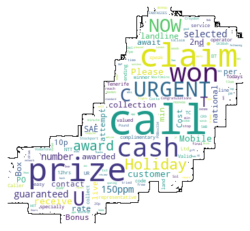

cluster size: 128
percent spam: 0.9765625
Da is good good player.why he is unsold.
Double mins and txts 4 6months FREE Bluetooth on Orange. Available on Sony Nokia Motorola phones. Call MobileUpd8 on 08000839402 or call2optout/N9DX
Its Ur luck to Love someone. Its Ur fortune to Love the one who Loves U. But its a miracle to Love a person who can't Love anyone except U... Gud nyt...


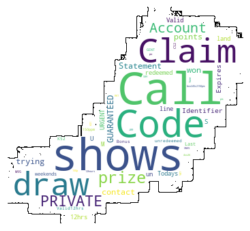

cluster size: 29
percent spam: 1.0
8007 FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W4 5WQ norm 150p/tone 16+
That's fine have him give me a call if he knows what he wants or has any questions
Wishing you and your family Merry X mas and HAPPY NEW Year in advance..


In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os 
from os import path 
from PIL import Image

spam_cluster_ids = [13, 20]
ham_cluster_ids = [18,16,15]

# https://amueller.github.io/word_cloud/auto_examples/masked.html 
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
spam_mask = np.array(Image.open(path.join(d, "spam.jpg")))
ham_mask = np.array(Image.open(path.join(d, "ham.jpg")))

for cluster_id in spam_cluster_ids:
    matching_indices = (km.labels_== cluster_id)
    all_text = " ".join(txt for txt in X[matching_indices.nonzero()[0]])
    word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                            width = 2048, height = 2048, mask=spam_mask,
                            contour_width=1, contour_color='black').generate(all_text)
    plt.imshow(word_cloud1, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    word_cloud1.to_file(path.join(d, "spam" + str(cluster_id) + ".png"))
    print("cluster size:",X[matching_indices].size)
    print("percent spam:",(y_train[matching_indices] == 0).sum() / matching_indices.sum())
    indices = np.random.choice(matching_indices.shape[0], 3, replace=False)
    for index in indices:
        print(X[index])

### Ham Clusters

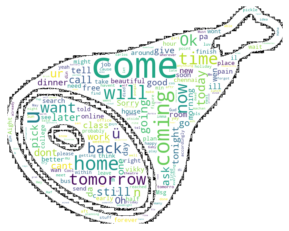

cluster size:  189
percent spam: 0.010582010582010581
Yes princess! I want to make you happy...
Call me when u finish then i come n pick u.
Surly ill give it to you:-) while coming to review.


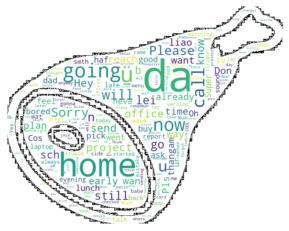

cluster size:  144
percent spam: 0.0
Leave it wif me lar... Ü wan to carry meh so heavy... Is da num 98321561 familiar to ü?
TheMob>Hit the link to get a premium Pink Panther game the new no. 1 from Sugababes a crazy Zebra animation or a badass Hoody wallpaper-all 4 FREE!
I am great princess! What are you thinking about me? :)


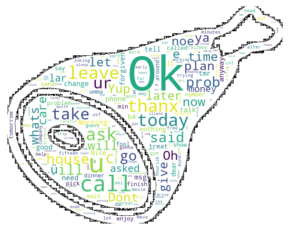

cluster size:  123
percent spam: 0.0
Cant think of anyone with * spare room off * top of my head
Did you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom's left over dinner ? Do you feel my Love ?
You give us back my id proof and ### rs. We wont allow you to work. We will come to your home within days


In [112]:
for cluster_id in ham_cluster_ids:
    matching_indices = (km.labels_== cluster_id)
    all_text = " ".join(txt for txt in X[matching_indices.nonzero()[0]])
    word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                            width = 2048, height = 2048, mask=ham_mask,
                            contour_width=1, contour_color='black').generate(all_text)
    plt.imshow(word_cloud1, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    word_cloud1.to_file(path.join(d, "ham" + str(cluster_id) + ".png"))
    print("cluster size: ",X[matching_indices].size)
    print("percent spam:",(y_train[matching_indices] == 0).sum() / matching_indices.sum())
    indices = np.random.choice(matching_indices.shape[0], 3, replace=False)
    for index in indices:
        print(X[index])
    

## Part B: Spam With Ham? Ham With Spam?

In [113]:
# cluster 5 spam with ham 
c5_indices = (km.labels_== 18)

c5_labels = y_train[c5_indices]
c5_messages = X[c5_indices]

print("Spam in Ham:", c5_messages[c5_labels == 0][0])
print("Spam in Ham:", c5_messages[c5_labels == 0][1])
print()

# cluster 13 ham with spam
c13_indices = (km.labels_ == 13)

c13_labels = y_train[c13_indices]
c13_messages = X[c13_indices]

print("Ham in Spam:",c13_messages[c13_labels == 1][0])
print("Ham in Spam:",c13_messages[c13_labels == 1][1])
print("Ham in Spam:",c13_messages[c13_labels == 1][2])

Spam in Ham: Did you hear about the new Divorce Barbie? It comes with all of Ken's stuff!
Spam in Ham: How come it takes so little time for a child who is afraid of the dark to become a teenager who wants to stay out all night?

Ham in Spam: Lolnice. I went from a fish to ..water.? spam	+123 Congratulations - in this week's competition draw u have won the £1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm
Ham in Spam: Speaking of does he have any cash yet?
Ham in Spam: Do you know when the result. spam	+123 Congratulations - in this week's competition draw u have won the £1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm


## Part C: Spam Generation

For the texts below, I believe they will fall into cluster 13, 20, 18, and 16 respectively based on their contents. <br>
I expect these to be close to one fo the clusters because I used a lot of the words from the word cloud. <br>
That is a lot of what the distance is based on, so I hope using them will lead to close messages. <br>
However, a lot of these are very common scam words too so its possible that they end up in one of the other <br>
17 clusters that the KMeans identified. 

In [114]:
text_c13 = "Urgent!! You have won a PRIZE! you have been selected to receive a BRAND NEW mobile! Call and speak to the representative to receive your prize today!"
text_c20 = "Urgent! you have won a private flight to land! This offer is only valid for 12hrs! Call todays for guaranteed shows and account! You will win points!"
text_c18 = "will you come home tomorrow? What time will you come in the morning? Will you be around tonight? I want you back now. Can you take the bus later? Do you have class tonight? I'm tired"
text_c16 = "Ok whats up? Yup ur now leaving to go to will house. I asked will to send fifteen houses to you. Pick them up later or you won't be forgivent. Ill need a min to finish b4 problem money. U take will fool noe. thanx"

### Verify Not In Dataset

In [115]:
assert((X == text_c13).sum() == 0)
assert((X == text_c20).sum() == 0)
assert((X == text_c18).sum() == 0)
assert((X == text_c16).sum() == 0)

print("All assertions passed!")

All assertions passed!


### Distance From Centers

In [116]:
texts = np.array([text_c13, text_c20, text_c18, text_c16])

newx = np.append(X, texts)
newx[-4:]

newx = vectorizer.fit_transform(newx)
tx = newx[-4:,:]

km.predict(tx)

array([13, 20, 18, 11])

As we can see from above, the text that I thought would be in cluster 13 was in cluster 13, the text i thought would be in 20 was in 20, <br>
the text I thought would be in 18 was in 18, but the text that I thought would be in 16 was in 11 instead. <br>
There are a couple reasons that this could be the case. Its likely that a lot of the words in that cluster <br>
could be found commonly in other clusters as well, and the message that I created could be on the edge of the cluster <br>
I predicted and the cluster that was actually shown. 

---------------------------------
# **Problem #3: PCA**